<a href="https://colab.research.google.com/github/ashwanimsajeev/ashwanims/blob/main/DL_CNN_Food101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving kaggle.json to kaggle (1).json
Dataset URL: https://www.kaggle.com/datasets/kmader/food41
License(s): copyright-authors
Found 80800 images belonging to 101 classes.
Found 20200 images belonging to 101 classes.


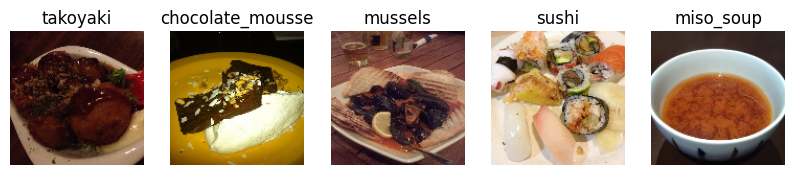

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 806/2525 ━━━━━━━━━━━━━━━━━━━━ 33:12 1s/step - accuracy: 0.0113 - loss: 4.6328

In [ ]:
from google.colab import files
files.upload()

# Set Kaggle API key path
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

# Download Food-101 dataset from Kaggle
!kaggle datasets download -d kmader/food41 --unzip

# Import necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset path
dataset_path = '/content/images'  # Change this if needed

# Define ImageDataGenerator for preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    validation_split=0.2  # 80-20 train-validation split
)

# Load training and validation data
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),  # Resize images
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Get class labels
class_names = list(train_generator.class_indices.keys())

# Plot a few sample images from the dataset
plt.figure(figsize=(10, 10))
for i in range(5):
    img, label = next(train_generator)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img[0])
    plt.title(class_names[np.argmax(label[0])])
    plt.axis('off')
plt.show()

# Define the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Save the trained model
model.save('food101_model.h5')

# Plot accuracy and loss graphs
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

# Evaluate the model on the validation data
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Loss: {test_loss:.4f}')

# Predict the labels for a batch of images
img_batch, label_batch = next(validation_generator)
predictions = model.predict(img_batch)
predicted_labels = np.argmax(predictions, axis=1)

# Print actual vs predicted labels for the first few samples
print("\nActual vs Predicted Labels (for the first few test samples):")
for i in range(10):
    print(f"Actual: {class_names[np.argmax(label_batch[i])]}, Predicted: {class_names[predicted_labels[i]]}")


In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=class_names))
